## Part 2

### Part 2A

Consider the following methods (research designs) that we have covered in the course:
1. (Full) Random Assignment
2. Conditional Independence
3. Instrumental Variables
4. Difference-in-Differences
Based only on the descripJons given on the previous two pages, discuss the likelihood that
each of the four methods above can be used to provide credible esJmates of the causal
effect of interest if applied to the data you have been given. Be careful about which
assumptions are necessary and the potential concerns with these assumptions in this
setting

#### 1. Random Assignment

Random assignment is not likely to provide the credible estimates, here are the reasons:
<br>
The assumption of (full) random assignment is "treatment is (as-good-as) randomly assigned so independent of potential outcomes".
<br>
In this case, the potential outcome is the overrun percentage in each municipality, but we can not say the treatment is randomly assigned.
<br>
The treatment here is the action if the municipality decides to adopt the NewBudg tool, but it is affected by some factors systematically and thus less likely to be randomly assigned. For example, it is affected by the education of directors because the directors educated out of Copenhagen are less likely to adopt this tool.
<br>
The situation that the treatment is not randomly assigned makes the assumption fails.

#### 2. Conditional Independence

Conditional independence is a better to provide the credible estimates.
<br>
The assumption of conditional independence is that among individuals with the same values of other characteristics, treatment is (as-good-as) randomly assigned so independent of potential outcomes.
<br>
This sounds more applicable in our case: imagining we can control all other variables that affect our treatment, such as the education of directors in each municipality, then the assumption of conditional independence can be successful.
<br>
However, there are still some situations that need to be considered. For example, we may not able to control all the variables that may affect our potential outcome due to the fact we may not have access to all the data or our ignorance of some variables.   

#### 3. Instrumental Variables

Instrumental variables may not apply to our case.
<br>
The assumpution of instrumental variable is "treatment assignment is (as-good-as) randomly assigned and only influences outcomes via the actural treatment". However, in this case, the decision to use NewBudg leads to actual use of Newbudg directly, so we can not distinguish instrumental varible in our case.

#### 4. Difference-in-Difference

DID can be a good method in our case since it can take full advantage of our data with records of different years. But there are still some concerns.
<br>
The assumptions of DID are 1) Observations pertain to individuals in different time periods; 2) Individuals are independent draws from population of interest; 3) Some individuals are eventually treated, others are never treated; 4) Treatment occurs at/just before time period 1 and we observe data for at least this time period and the period before; 5) For each time period after treatment, all individuals have a potential outcome with and without treatment; 6) For time periods before, individuals only have a potential outcome without treatment. The potential outcomes are unobserved but we observe the actual outcome.
<br>
Our datasets satisfy most assumptions except for the 2) since as we mentioned before, the individuals, municipalities in our case, may not be assigned randomly. This problem can be fixed if combining conditional independence and difference in difference.

### Part 2B

Pick the two methods from 2A that you found most likely to provide credible estimates and implement them as well as you can using the data you have been given. Be sure to go through all relevant steps and checks.

For this part, I will choose i) Conditional Independence, ii) Difference-in-Difference.

#### 1) Conditional Independence


According to the information above, the Danish government is interested in the year 2018 and 2019. Thus, for CIV, we will only analyze the dataset from 2018 and 2019. Since variables are different between different years, we will analyze the two datasets separately.

First, we decide our treatment, outcome, and covariates that will enter into our model.
<br>
Our treatment variable is *newbudge*, and the outcome variable is *budgoverrun*.
<br>
For the covariates, we refer to the takeaways A, D, E, F, and conclude that, 1) the individual beliefs and personalities of bureaucrats, 2) the structure of the municipal budget and expectations about the size of budget overruns are important are important.
<br>
For 1), we take the variables *directorage*, *directoruni*, *directorphd* into consideration; for 2) we take the variables *majhh*, *libraries*, *sportsteams*.

Second, we use a linear regression for our estimation, whcih requires the linear relationship outcomes and covariants, so we will also examine the relationship between them to see if we need to include any squared terms and logarithms in our model (the source is the CIA.pdf).

At last, we need to check if other pre-determined covariates that do not enter into the model are independent.

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [3]:
# Step 1: Read the datasets
budg_2018 = pd.read_csv("munic_data2018.csv")
budg_2019 = pd.read_csv("munic_data2019.csv")

In [4]:
# Step 2: Exam if there are any missing values
budg_2018.describe()

,mun,budg,budgoverrun,newbudg,pop,avgage,avginc,libraries,sportsteams,directorage,directorphd
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,461.656566,13153.934152,2.153737,0.585859,58395.858586,37.894242,373453.797980,2.010101,640.282828,62.838384,0.141414
std,235.401618,5866.971070,2.279391,0.495080,71699.912988,2.536636,68241.329114,1.182310,757.319117,5.224954,0.350222
min,101.000000,6267.366000,-4.030000,0.000000,83.000000,31.160000,221449.000000,1.000000,0.000000,49.000000,0.000000
25%,245.000000,10229.330000,0.570000,0.000000,29748.000000,35.490000,315901.000000,2.000000,179.000000,59.000000,0.000000
50%,430.000000,12230.070000,2.310000,1.000000,43000.000000,38.380000,391923.000000,2.000000,499.000000,63.000000,0.000000
75%,688.500000,14512.305000,3.685000,1.000000,60248.000000,40.305000,419292.500000,2.000000,756.500000,67.000000,0.000000
max,860.000000,56887.000000,6.570000,1.000000,613288.000000,41.620000,482409.000000,10.000000,5426.000000,73.000000,1.000000


In [9]:
# Creating dummies in 2018
dum_2018 = pd.get_dummies(budg_2018[['majhh','directoruni']])
dum_2018.describe()

,majhh_Couple,majhh_CoupleWkids,majhh_Other,majhh_Single,majhh_SingleWkids,directoruni_AAU,directoruni_AU,directoruni_KU,directoruni_Other,directoruni_SDU
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.272727,0.252525,0.222222,0.131313,0.121212,0.090909,0.222222,0.464646,0.131313,0.090909
std,0.447628,0.436672,0.417855,0.339461,0.328035,0.288943,0.417855,0.501287,0.339461,0.288943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
budg_2019.describe()

,mun,budg,budgoverrun,newbudg,pop,avgage,avginc,libraries,sportsteams,directorage,directorphd
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,461.656566,13268.792707,3.175354,0.585859,58647.282828,39.054646,375016.515152,2.040404,642.515152,63.838384,0.141414
std,235.401618,6087.322870,2.249491,0.495080,72771.699818,2.539889,66770.424119,1.277108,765.303893,5.224954,0.350222
min,101.000000,6273.366000,-2.870000,0.000000,90.000000,33.000000,231603.000000,1.000000,0.000000,50.000000,0.000000
25%,245.000000,10440.755000,1.630000,0.000000,29875.000000,36.695000,313611.000000,2.000000,179.500000,60.000000,0.000000
50%,430.000000,12355.280000,3.250000,1.000000,42984.000000,39.430000,398493.000000,2.000000,498.000000,64.000000,0.000000
75%,688.500000,14430.805000,4.630000,1.000000,60331.000000,41.365000,418245.000000,2.000000,758.000000,68.000000,0.000000
max,860.000000,59008.000000,7.340000,1.000000,623404.000000,42.610000,491307.000000,12.000000,5504.000000,74.000000,1.000000


In [10]:
# Creating dummies in 2019
dum_2019 = pd.get_dummies(budg_2019[['majhh','directoruni']])
dum_2019.describe()

,majhh_Couple,majhh_CoupleWkids,majhh_Other,majhh_Single,majhh_SingleWkids,directoruni_AAU,directoruni_AU,directoruni_KU,directoruni_Other,directoruni_SDU
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.272727,0.202020,0.222222,0.161616,0.141414,0.090909,0.222222,0.464646,0.131313,0.090909
std,0.447628,0.403551,0.417855,0.369972,0.350222,0.288943,0.417855,0.501287,0.339461,0.288943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the steps, we can conclude that we do not have any missing or extreme values that should be excluded.

In [14]:
# Concatenate the dummy variables to the original DataFrame

budg_2018 = pd.concat([budg_2018, dum_2018], axis=1)
budg_2019 = pd.concat([budg_2019, dum_2019], axis=1)

In [15]:
# Steps 3: Fit linear model

# 2018
mod_2018 = smf.ols(formula='budgoverrun ~ newbudg + libraries + sportsteams + directorage + directorphd + C(majhh) + C(directoruni)', 
                   data=budg_2018)
res_2018 = mod_2018.fit(cov_type = "HC0")
res_2018.summary()

/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            budgoverrun   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     11.70
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.42e-13
Time:                        14:33:28   Log-Likelihood:                -197.40
No. Observations:                  99   AIC:                             420.8
Df Residuals:                      86   BIC:                             454.5
Df Model:                          12                                         
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.5331      2.806      3.398      0.001       4.034      15.032
C(majhh)[T.CoupleWkids]     0.0893      0.644      0.139      0.890      -1.173       1.352
C(majhh)[T.Other]           0.4064      1.126      0.361      0.718      -1.800       2.613
C(majhh)[T.Single]         -0.0812      0.273     -0.297      0.766      -0.617       0.455
C(majhh)[T.SingleWkids]    -0.6683      1.051     -0.636      0.525      -2.729       1.393
C(directoruni)[T.AU]       -0.3406      0.627     -0.543      0.587      -1.570       0.888
C(directoruni)[T.KU]       -1.0854      1.078     -1.007      0.314      -3.198       1.027
C(directoruni)[T.Other]    -0.0812      0.273     -0.297      0.766      -0.617       0.455
C(directoruni)[T.SDU]      -0.4206      0.705     -0.597      0.551      -1.802       0.961
newbudg                    -0.3536      0.385     -0.918      0.359      -1.109       0.402
libraries                   0.9478      0.197      4.811      0.000       0.562       1.334
sportsteams                -0.0015      0.000     -3.299      0.001      -0.002      -0.001
directorage                -0.1167      0.045     -2.613      0.009      -0.204      -0.029
directorphd                -1.0312      0.573     -1.798      0.072      -2.155       0.093
==============================================================================
Omnibus:                        2.738   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.208
Skew:                          -0.352   Prob(JB):                        0.331
Kurtosis:                       3.197   Cond. No.                     1.22e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The smallest eigenvalue is 6.48e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# Steps 3: Fit linear model

# 2019
mod_2019 = smf.ols(formula='budgoverrun ~ newbudg + libraries + sportsteams + directorage + directorphd + C(majhh) + C(directoruni)', 
                   data=budg_2019)
res_2019 = mod_2019.fit(cov_type = "HC0")
res_2019.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            budgoverrun   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     8.583
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.71e-11
Time:                        14:38:19   Log-Likelihood:                -192.02
No. Observations:                  99   AIC:                             412.0
Df Residuals:                      85   BIC:                             448.4
Df Model:                          13                                         
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3382      2.878      3.592      0.000       4.697      15.980
C(majhh)[T.CoupleWkids]     0.2200      0.625      0.352      0.725      -1.006       1.446
C(majhh)[T.Other]           0.7824      0.877      0.892      0.372      -0.937       2.502
C(majhh)[T.Single]          1.5419      0.964      1.600      0.110      -0.347       3.431
C(majhh)[T.SingleWkids]     0.1144      0.943      0.121      0.903      -1.733       1.962
C(directoruni)[T.AU]        0.5232      0.680      0.770      0.441      -0.809       1.855
C(directoruni)[T.KU]       -1.3404      0.876     -1.530      0.126      -3.057       0.376
C(directoruni)[T.Other]    -0.8527      1.102     -0.773      0.439      -3.013       1.308
C(directoruni)[T.SDU]      -0.3045      0.671     -0.454      0.650      -1.620       1.011
newbudg                    -0.3244      0.438     -0.742      0.458      -1.182       0.533
libraries                   0.7915      0.195      4.050      0.000       0.409       1.175
sportsteams                -0.0016      0.001     -2.803      0.005      -0.003      -0.000
directorage                -0.1152      0.043     -2.664      0.008      -0.200      -0.030
directorphd                -0.1090      0.401     -0.272      0.786      -0.895       0.677
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.535
Skew:                          -0.110   Prob(JB):                        0.765
Kurtosis:                       3.285   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


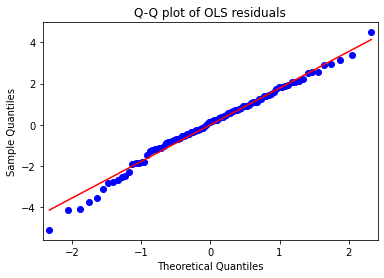

In [23]:
# Step 4: Check the linear regression
# 2018
fig = sm.qqplot(res_2018.resid, line='s')
# Show the plot
plt.title('Q-Q plot of OLS residuals')
plt.show()

/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


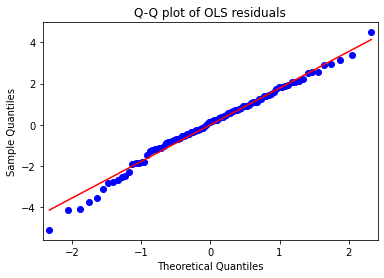

In [24]:
# Step 4: Check the linear regression
# 2019
fig = sm.qqplot(res_2018.resid, line='s')
# Show the plot
plt.title('Q-Q plot of OLS residuals')
plt.show()

From the QQ plot we draw from our model, we can see the linear assumption holds for our analysis.

In [25]:
# Step 5: Testable implications (assumption check)

#Defining a list of predetermined variables
covariates = ['budg', 'pop', 'avgage', 'avginc']

In [27]:
# 2018
models = []
for var in covariates:
    
    # Define the model
    mod = smf.ols(formula=f'{var} ~ newbudg + libraries + sportsteams + directorage + directorphd + C(majhh) + C(directoruni)', data = budg_2018).fit(cov_type='HC0') 

    models.append(mod)
    
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
table_result.custom_columns(covariates, [1 for i in range(len(covariates))])
table_result

/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but

In [28]:
# 2019
models = []
for var in covariates:
    
    # Define the model
    mod = smf.ols(formula=f'{var} ~ newbudg + libraries + sportsteams + directorage + directorphd + C(majhh) + C(directoruni)', data = budg_2019).fit(cov_type='HC0') 

    models.append(mod)
    
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
table_result.custom_columns(covariates, [1 for i in range(len(covariates))])
table_result

From the assumption check above, we can see the budget, average income and average age are still kind of dependent on the treatment *newbudg*, suggesting that those variables may should be included in further analysis. 
<br>
This makes sense since the average incomes, average ages and budget also affect the overall estimation.

#### 2) Difference in Difference

For the DID method, we will include all time periods in our analysis, thus we will create the dummies for time period. Since 2016 is the year that Newbudg comes into effect in municipalities, then the time dummy for 2016 is t = 1, and the time dummy for 2015 should be t = 0.

Same as before, Our treatment variable is *newbudge*, and the outcome variable is *budgoverrun*.

At last, we will also do assumption check to see if the actual outcomes move in parallel across the municipalities adopting Newbudg or not.

In [35]:
# Step 1: read the dataset
# Step 2: examine if there are missing or extreme values

budg_all = pd.read_csv("munic_dataALL.csv")
budg_all.describe()

,mun,year,budg,budgoverrun,newbudg,pop,avgage,avginc,libraries,sportsteams,directorage,directorphd
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,461.656566,2014.500000,12827.211892,2.758071,0.234343,57180.556566,38.493859,373071.559596,1.987879,627.252525,59.338384,0.141414
std,234.328081,2.873733,5385.236815,2.735504,0.423802,67566.926202,2.557348,67685.884667,1.167410,725.023469,5.942226,0.348624
min,101.000000,2010.000000,6252.366000,-5.960000,0.000000,78.000000,31.160000,212322.000000,1.000000,0.000000,41.000000,0.000000
25%,240.000000,2012.000000,9987.717250,0.882500,0.000000,29459.250000,36.152500,315234.500000,1.000000,170.000000,55.000000,0.000000
50%,430.000000,2014.500000,12102.370000,2.485000,0.000000,42852.000000,38.950000,394539.500000,2.000000,499.500000,59.000000,0.000000
75%,706.000000,2017.000000,14259.125000,4.500000,0.000000,59849.750000,40.837500,418877.250000,2.000000,756.750000,64.000000,0.000000
max,860.000000,2019.000000,59008.000000,11.570000,1.000000,623404.000000,42.610000,491307.000000,12.000000,5504.000000,74.000000,1.000000


In [36]:
# Step 3: creating the time variable
budg_all["time"] = budg_all["year"] - 2015

In [39]:
# Step 4: creating time dummies and DID model

pre_DID = smf.ols("budgoverrun ~ newbudg + C(time, Treatment(reference=0)) + newbudg*C(time, Treatment(reference=0))", 
              data=budg_all).fit(cov_type = 'cluster', cov_kwds = {'groups':budg_all['mun']})
pre_DID.summary()

/Users/a152749441/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 13
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            budgoverrun   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     32.60
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           8.27e-30
Time:                        16:38:20   Log-Likelihood:                -2327.1
No. Observations:                 990   AIC:                             4682.
Df Residuals:                     976   BIC:                             4751.
Df Model:                          13                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.3836      0.264      9.043      0.000       1.867       2.900
C(time, Treatment(reference=0))[T.-5]             1.2491      0.154      8.120      0.000       0.948       1.551
C(time, Treatment(reference=0))[T.-4]             1.3171      0.141      9.357      0.000       1.041       1.593
C(time, Treatment(reference=0))[T.-3]             1.5433      0.143     10.760      0.000       1.262       1.824
C(time, Treatment(reference=0))[T.-2]             1.2799      0.134      9.539      0.000       1.017       1.543
C(time, Treatment(reference=0))[T.-1]             0.3469      0.133      2.610      0.009       0.086       0.607
C(time, Treatment(reference=0))[T.1]             -1.3668      0.324     -4.220      0.000      -2.002      -0.732
C(time, Treatment(reference=0))[T.2]             -1.0910      0.303     -3.602      0.000      -1.685      -0.497
C(time, Treatment(reference=0))[T.3]             -0.3651      0.318     -1.147      0.251      -0.989       0.259
C(time, Treatment(reference=0))[T.4]              0.7227      0.312      2.319      0.020       0.112       1.334
newbudg                                           0.0369      0.308      0.120      0.904      -0.566       0.640
newbudg:C(time, Treatment(reference=0))[T.-5]  3.011e-16   3.89e-17      7.746      0.000    2.25e-16    3.77e-16
newbudg:C(time, Treatment(reference=0))[T.-4] -3.855e-16   7.87e-17     -4.900      0.000    -5.4e-16   -2.31e-16
newbudg:C(time, Treatment(reference=0))[T.-3] -2.328e-16   9.97e-17     -2.335      0.020   -4.28e-16   -3.74e-17
newbudg:C(time, Treatment(reference=0))[T.-2] -2.523e-17   1.05e-17     -2.394      0.017   -4.59e-17   -4.58e-18
newbudg:C(time, Treatment(reference=0))[T.-1]          0          0        nan        nan           0           0
newbudg:C(time, Treatment(reference=0))[T.1]     -0.4793      0.243     -1.974      0.048      -0.955      -0.003
newbudg:C(time, Treatment(reference=0))[T.2]      0.2416      0.227      1.064      0.287      -0.204       0.687
newbudg:C(time, Treatment(reference=0))[T.3]      0.1938      0.223      0.868      0.386      -0.244       0.632
newbudg:C(time, Treatment(reference=0))[T.4]      0.0808      0.222      0.364      0.716      -0.354       0.516
==============================================================================
Omnibus:                       25.914   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.722
Skew:                           0.251   Prob(JB):                     5.22e-05
Kurtosis:                       2.525   Cond. No.                     1.02e+33
==================================================================

Step 5: Assumption Check
<br>
We can tell the assumption holds because there are no differences in pretrends since the coefficients ($ 𝛽_{-5},𝛽_{-4},𝛽_{-3},𝛽_{-2},𝛽_{-1}$) are close to zero (Source: DID slides)